# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Amelia Teare https://github.com/acteare/620-Mod-7

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

## Question 1

In [2]:
import requests

def save_html_from_url(url, file_path):
    try:
        response = requests.get(url)
        response.raise_for_status()

        html_content = response.text

        with open(file_path, 'w', encoding='utf-8') as file:
            file.write(html_content)

        print(f"HTML content saved to {file_path}")
    except requests.exceptions.RequestException as e:
        print(f"Error: {e}")

url = input("Enter the URL of the website: ")
file_path = input("Enter the file path to save the HTML content (e.g., my_website.html): ")

save_html_from_url(url, file_path)

Enter the URL of the website:  https://www.sciencealert.com/study-confirms-that-you-can-really-communicate-with-your-cat-by-doing-this
Enter the file path to save the HTML content (e.g., my_website.html):  my_article.html


HTML content saved to my_article.html


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

## Question 2

In [5]:
from bs4 import BeautifulSoup
from textblob import TextBlob
import re

file_path = 'my_article.html'
with open (file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')

article_text = soup.get_text()

blob = TextBlob(article_text)
polarity_score = blob.sentiment.polarity

sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s',article_text)
num_sentences = len(sentences)

print("Sentiment Analysis:")
if polarity_score > 0:
    print("Positive sentiment")
elif polarity_Score < 0:
    print("Negative sentiment")
else:
    print("Neutral sentiment")

print(f"Polarity Score: {polarity_score:.2f}")
print(f"Number of Sentences: {num_sentences}")

Sentiment Analysis:
Positive sentiment
Polarity Score: 0.13
Number of Sentences: 40


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

## Question 3

In [8]:
import spacy
from collections import Counter
import re

nlp = spacy.load("en_core_web_sm")

doc = nlp(article_text)
tokens = [token.text.lower() for token in doc if re.match(r'^[a-zA-Z0-9]*$', token.text)]

token_freq = Counter(tokens)
most_common_tokens = token_freq.most_common(5)

print("Most Common Tokens and Frequencies:")
for token, freq in most_common_tokens:
    print(f"{token}: {freq}")

Most Common Tokens and Frequencies:
the: 43
to: 36
cats: 26
a: 23
and: 23


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

## Question 4

In [9]:
import spacy
from collections import Counter
import re
from bs4 import BeautifulSoup

nlp = spacy.load("en_core_web_sm")

lemmas = [token.lemma_.lower() for token in doc if re.match(r'^[a-zA-Z0-9]*$', token.lemma_)]

lemma_freq = Counter(lemmas)
most_common_lemmas = lemma_freq.most_common(5)

print("Most Common Lemmas and Frequencies:")
for lemma, freq in most_common_lemmas:
    print(f"{lemma}: {freq}")

Most Common Lemmas and Frequencies:
be: 48
the: 43
cat: 41
to: 36
human: 23


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Question 5

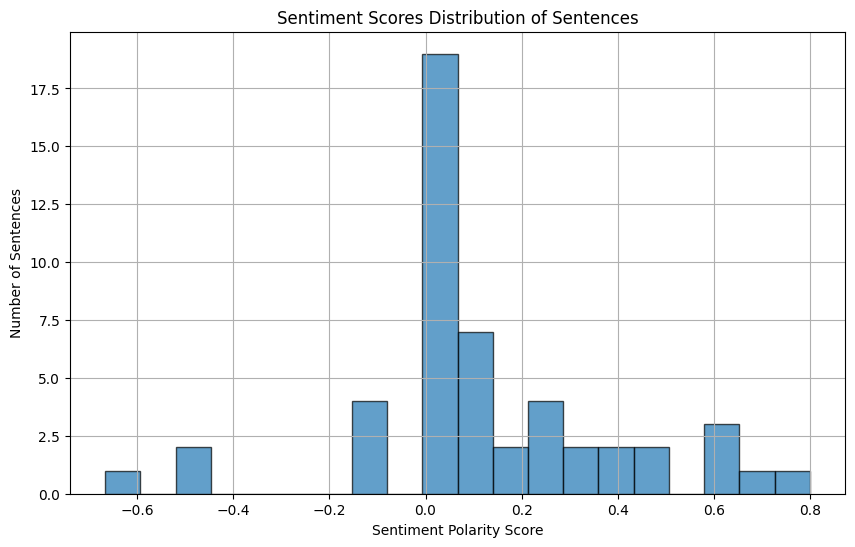

In [14]:
import spacy
import matplotlib.pyplot as plt
from textblob import TextBlob
from bs4 import BeautifulSoup

nlp = spacy.load("en_core_web_sm")
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()
doc = nlp(article_text)

sentence_scores =[TextBlob(sent.text).sentiment.polarity for sent in doc.sents]

plt.figure(figsize=(10,6))
plt.hist(sentence_scores, bins=20, edgecolor='black', alpha=0.7)
plt.title("Sentiment Scores Distribution of Sentences")
plt.xlabel("Sentiment Polarity Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.show()

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

## Question 6

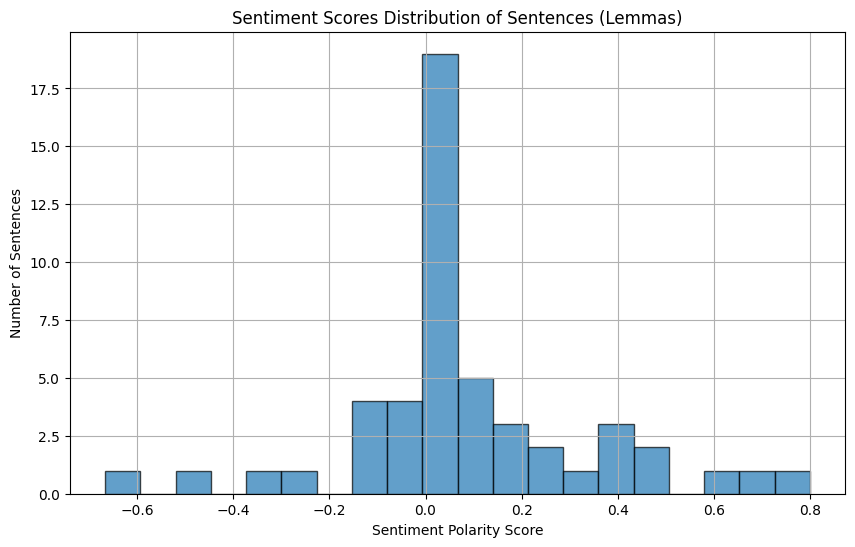

In [16]:
import spacy
import matplotlib.pyplot as plt
from textblob import TextBlob
from bs4 import BeautifulSoup

nlp = spacy.load("en_core_web_sm")
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()
doc = nlp(article_text)
lemma_sentiments = []

for sent in doc.sents:
    lemma_sentiments.append((sent, TextBlob(" ".join([token.lemma_ for token in sent])).sentiment.polarity))

plt.figure(figsize=(10,6))
sentiment_Scores = [score for _, score in lemma_sentiments]
plt.hist(sentiment_Scores, bins=20, edgecolor='black', alpha=0.7)
plt.title("Sentiment Scores Distribution of Sentences (Lemmas)")
plt.xlabel("Sentiment Polarity Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.show()

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.4
* Cutoff Score (lemmas): 0.3

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

## Question 8

In [19]:
import spacy
from textblob import TextBlob
from bs4 import BeautifulSoup

cutoff_score = 0.4
sentence_list = []

for sent in doc.sents:
    sentence_score = TextBlob(sent.text).sentiment.polarity
    if sentence_score > cutoff_score:
        sentence_list.append(sent.text.strip())

summary_text = ' '.join(sentence_list)

print("Summary:")
print(summary_text)

Summary:
"As someone who has both studied animal behavior and is a cat owner, it's great to be able to show that cats and humans can communicate in this way," Karen McComb, a University of Sussex psychologist, said in a 2020 statement. The expression is interpreted as a kind of cat smile. "And it is something you can try yourself with your own cat at home or with cats you meet in the street. It's a great way of enhancing the bond you have with cats. "

Dogs may be much more enthusiastically demonstrative than cats, but this news isn't a surprise for cat lovers. Cats, for example, respond in kind to humans who are receptive to them – so if you find cats standoffish, that might be a problem with you, not the kitty. And that's a good thing to know.


9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

## Question 9

In [20]:
summary_blob = TextBlob(summary_text)
summary_polarity_tokens = summary_blob.sentiment.polarity

print("Sentiment Polarity Score for the Summary (Tokens):", summary_polarity_tokens)
num_sentences_summary = len(sentence_list)
print("Number of Sentences in the Summarized Article:", num_sentences_summary)

Sentiment Polarity Score for the Summary (Tokens): 0.6
Number of Sentences in the Summarized Article: 7


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

## Question 10

In [23]:
import spacy
from textblob import TextBlob
from bs4 import BeautifulSoup

cutoff_score_lemmas = 0.3
sentence_list = []

for sent in doc.sents:
    sentence_score = TextBlob(" ".join([token.lemma_ for token in sent])).sentiment.polarity
    if sentence_score > cutoff_score_lemmas:
        sentence_list.append(sent.text.strip())

summary_text = ' '.join(sentence_list)

print("Summary:")
print(summary_text)

Summary:
You just need to smile at them more. "As someone who has both studied animal behavior and is a cat owner, it's great to be able to show that cats and humans can communicate in this way," Karen McComb, a University of Sussex psychologist, said in a 2020 statement. "It's something that many cat owners had already suspected, so it's exciting to have found evidence for it. The expression is interpreted as a kind of cat smile. "And it is something you can try yourself with your own cat at home or with cats you meet in the street. It's a great way of enhancing the bond you have with cats. "

Dogs may be much more enthusiastically demonstrative than cats, but this news isn't a surprise for cat lovers. And that's a good thing to know.


11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

## Question 11

In [24]:
summary_blob = TextBlob(summary_text)
summary_polarity_lemmas = summary_blob.sentiment.polarity

print("Sentiment Polarity Score for the Summary (Lemmas):", summary_polarity_lemmas)
num_sentences_summary = len(sentence_list)
print("Number of Sentences in the Summarized Article:", num_sentences_summary)

Sentiment Polarity Score for the Summary (Lemmas): 0.5333333333333333
Number of Sentences in the Summarized Article: 8


## Question 12

12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.

The summary polarity score based on tokens was 0.6 while the summary polarity score based on lemmas was 0.533. These numbers, while technically different, aren't different enough to cause alarm. I think this is because the cutoff score for both the lemmas and tokens were roughly the same. The tokens had a cutoff score of 0.4, while the lemmas had a cutoff score of 0.3. The sentences in the lemmas summary text had a lot of overlap with the sentences in the tokens summary text. This is why the scores are not that far off from each other. 

## Question 13

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

Reading the two summaries, there is not much difference between them. They both contain roughly the same information. However, I do believe the tokens summary provides a bit more information related to the original article than the lemmas. In some ways, the lemmas summary feels more like a bullet point of key quotes. The tokens summary contains the same quotes, but has a few sentences that further provide explanation. So between the two, I think the tokens summary is better when comparing it to the original article. 